In [151]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import openpyxl

In [152]:
dates = pd.read_excel('EventStudies_11_march-3 (2).xlsx', sheet_name='Results')
dates = dates.dropna(subset='Acquiror ticker symbol')
print(dates.shape[0])
# dates = dates.drop_duplicates(subset='Acquiror name', keep='first')

1469


In [153]:
dates = dates[(dates.groupby('Acquiror ticker symbol')['Announced date'].diff().fillna(201)>200)]
dates = dates.replace('n.a.', None, regex=True).dropna(subset='Pre-deal acquiror market capitalisation\nEUR')

In [154]:
prices = pd.read_csv('HistoricalPricesАвтоматическиВосстановлено.csv', delimiter=';')

/var/folders/g5/mzy3t8rn7pndp8tlt6b698qc0000gn/T/ipykernel_54651/2854334214.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,2

In [155]:
prices_final = prices.drop(2).drop(1).dropna(axis=1, how='all')
prices_final.columns = prices_final.iloc[0,:].values
prices_final =prices_final.drop(0)
prices_final = prices_final.loc[:, ~prices_final.columns.duplicated()].replace(',','.', regex=True)

In [156]:
prices_final

,Acquiror ticker symbol,TRN,TRN_copy,BBY,BBY_copy,SOI,SOI_copy,600699,600699_copy,JSG,...,REACH,REACH_copy,OLYMP,OLYMP_copy,ADEN,ADEN_copy,DNZYO,DNZYO_copy,^SXXL,^SXXL_copy
3,NaN,8.545,02.01.2009,29.02,02.01.2009,11.55,12.05.2017,5.82143,16.12.2011,0.0963,...,0.705,15.08.2014,1.2,02.01.2009,1.1,02.01.2009,NaN,NaN,208,01.01.2009
4,NaN,8.6,05.01.2009,30,05.01.2009,11.75,15.05.2017,5.85,19.12.2011,0.1075,...,0.695,18.08.2014,1.2,05.01.2009,1.06,05.01.2009,NaN,NaN,212.77,02.01.2009
5,NaN,8.95,06.01.2009,31.25,06.01.2009,12.03,16.05.2017,5.82143,20.12.2011,0.105,...,0.695,19.08.2014,1.2,07.01.2009,1.04,06.01.2009,NaN,NaN,212.49,05.01.2009
6,NaN,8.34,07.01.2009,29.55,07.01.2009,12.04,17.05.2017,5.72143,21.12.2011,0.1025,...,0.68,20.08.2014,1.1,08.01.2009,1.01,07.01.2009,NaN,NaN,212.76,06.01.2009
7,NaN,8.49,08.01.2009,29.65,08.01.2009,12,18.05.2017,5.58571,22.12.2011,0.1,...,0.67,21.08.2014,1.1,09.01.2009,1,08.01.2009,NaN,NaN,214.36,07.01.2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.35,23.12.2019
2822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.92,24.12.2019
2823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349.94,27.12.2019
2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.22,30.12.2019


In [157]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [158]:
def nearest(items, pivot):

        d = min([i for i in items if i >= pivot], key=lambda v: abs(v - pivot), default=0)

        return d


In [159]:
def caar_calc(prices_df, dates_df, start, end):


    final_results = pd.DataFrame()
    
    
    stoxx_prices = prices_df[["^SXXL", '^SXXL_copy']].rename(columns={'^SXXL_copy':'date'})
    
    for company in dates_df['Acquiror ticker symbol']:
        company = str(company)
        try:
            company_prices = prices_df[[company, company+'_copy']].rename(columns={company+'_copy':'date'}).dropna()
        except KeyError:
            print(company)
            continue

        merged_prices=company_prices.merge(stoxx_prices, on='date', how='left').ffill()
        merged_prices['date'] = pd.to_datetime(merged_prices['date'], dayfirst=True)
        merged_prices = merged_prices.set_index('date').astype('float64')
        company_returns = merged_prices.pct_change().dropna().sort_index()


        company_returns['rank'] = np.arange(0, company_returns.shape[0])


        ## Calculate days
        count = (final_results.index==company).sum()

        initial_date = dates_df[dates_df['Acquiror ticker symbol'] == company].reset_index()['Announced date'][count]
        initial_date = pd.to_datetime((initial_date - 25569) * 86400.0, unit='s')
        print(initial_date)
        k = company_returns.index
        final_date = nearest(pd.to_datetime(k), initial_date)
    
    
        if final_date == 0 or (final_date-initial_date).days>2 :
            print('shit')
            continue
    
    
        if initial_date != final_date:
            print(str(initial_date) + " : " + str(final_date))
    
    
        data_rank = company_returns[company_returns.index==final_date]['rank'].values[0]
    
        company_returns['days']=company_returns['rank']-data_rank
        company_returns_final = company_returns.drop(columns=['rank'])
    
    
        company_returns_205 = company_returns_final[(company_returns_final['days']>-206) & (company_returns_final['days']<-5)]
        print(company_returns_205.shape[0])
    
        if company_returns_205.shape[0]<200:
            print('<190')
            continue
    
        Y = company_returns_205[company]
        X = company_returns_205['^SXXL']
        # X = sm.add_constant(X)
        model = stats.linregress(X,Y)
    
    
        alpha = model.intercept
        beta = model.slope
    
    
    
        df_AR = company_returns_final[(company_returns_final['days']>=start) & (company_returns_final['days']<=end)]
    
        df_AR = df_AR.set_index('days')
        # df_AR[company] = df_AR['^SXXL'] - df_AR[company]
        df_AR[company] = df_AR[company] - (alpha + beta * df_AR[company])
    
    
        final_results = final_results.append(pd.DataFrame(df_AR[company]).T)
    return final_results

In [160]:
final_results = caar_calc(prices_final, dates, -10, 10)

2012-12-12 00:00:00
200
2015-02-05 00:00:00
200
2015-11-17 00:00:00
shit
2017-12-07 00:00:00
200
2014-10-27 00:00:00
shit
2017-08-21 00:00:00
200
2019-12-19 00:00:00
200
2015-07-29 00:00:00
200
2019-10-02 00:00:00
200
2017-12-05 00:00:00
200
2017-01-27 00:00:00
200
2019-12-06 00:00:00
200
2019-04-14 00:00:00
2019-04-14 00:00:00 : 2019-04-15 00:00:00
200
2018-07-20 00:00:00
200
2016-12-12 00:00:00
200
2017-09-20 00:00:00
shit
2017-06-12 00:00:00
200
2014-06-02 00:00:00
shit
2014-06-26 00:00:00
shit
2015-03-20 00:00:00
200
2016-12-20 00:00:00
200
2013-07-01 00:00:00
200
2018-02-15 00:00:00
200
2014-04-07 00:00:00
200
2014-06-02 00:00:00
shit
2019-07-03 00:00:00
200
2019-05-29 00:00:00
200
2017-07-10 00:00:00
200
2010-12-06 00:00:00
shit
2016-06-21 00:00:00
200
2014-10-16 00:00:00
shit
2016-04-13 00:00:00
200
2015-05-25 00:00:00
200
2018-07-12 00:00:00
shit
2015-07-30 00:00:00
200
2014-03-27 00:00:00
200
2015-04-20 00:00:00
200
2019-06-18 00:00:00
200
2019-11-07 00:00:00
200
2014-01-22 00

In [161]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]
    return df

In [162]:
for col in final_results.loc[:,-5:5].columns:
    wo_outliers = remove_outliers(final_results.loc[:,-5:5], col)

final_results = wo_outliers

In [163]:
final_results = final_results.dropna()

In [164]:
def calc_tstat(results):
    for n in [[-5,5], [-2,2], [-1,1]]:
        AAR = results.loc[:,n[0]:n[1]].mean()
        CAAR = AAR.sum()
        print(str(n[0]) + ' : ' + str(n[1]) + ' t-stat')
        print(str(CAAR) + " : " + str(CAAR/(np.sqrt((AAR.shape[0]-1))*AAR.std())))

In [165]:
calc_tstat(final_results)

-5 : 5 t-stat
0.007088620747459967 : 1.5914600706566655
-2 : 2 t-stat
0.007712028263109754 : 2.6001724397920722
-1 : 1 t-stat
0.005720114081720807 : 2.131620662375734


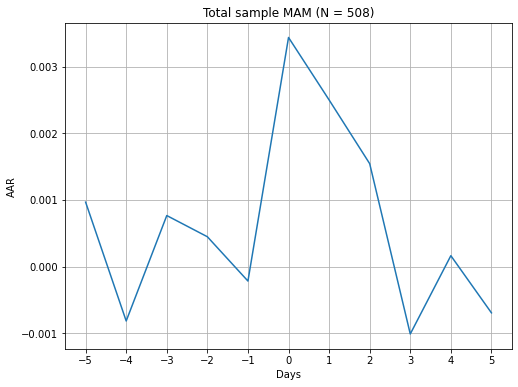

In [166]:
plot_AAR = final_results.mean()

plt.figure(figsize=(8, 6))
plot_AAR.plot()
plt.xticks(np.arange(-5,6,1))

plt.title('Total sample MAM' + ' (N = ' + str(final_results.shape[0]) + ')')
plt.xlabel('Days')
plt.ylabel('AAR')
plt.grid(True)
plt.show()


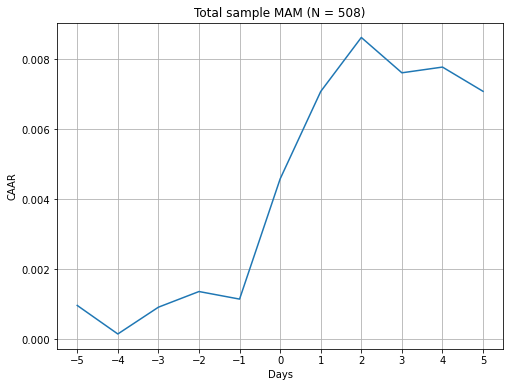

In [167]:


plot_AAR = final_results.mean().cumsum()

plt.figure(figsize=(8, 6))
plot_AAR.plot()
plt.xticks(np.arange(-5,6,1))

plt.title('Total sample MAM' + ' (N = ' + str(final_results.shape[0]) + ')')
plt.xlabel('Days')
plt.ylabel('CAAR')

plt.grid(True)
plt.show()

In [168]:
calc_tstat(final_results.dropna())

-5 : 5 t-stat
0.007088620747459967 : 1.5914600706566655
-2 : 2 t-stat
0.007712028263109754 : 2.6001724397920722
-1 : 1 t-stat
0.005720114081720807 : 2.131620662375734


In [169]:
resultsUK = final_results[final_results.index.isin(dates[dates['Acquiror country'] == 'United Kingdom']['Acquiror ticker symbol'])]
resultsNotUK = final_results[final_results.index.isin(dates[dates['Acquiror country'] != 'United Kingdom']['Acquiror ticker symbol'])]

In [170]:
# T-Stat Results UK MAM
calc_tstat(resultsUK.dropna())

-5 : 5 t-stat
0.00761503836377876 : 1.6426476558460832
-2 : 2 t-stat
0.007923314140974237 : 2.955774351256014
-1 : 1 t-stat
0.004965002194492291 : 1.8879697867126852


In [171]:
# T-Stat Results not UK MAM
calc_tstat(resultsNotUK.dropna())

-5 : 5 t-stat
0.006129236561666862 : 1.2909205905200372
-2 : 2 t-stat
0.007288072825025754 : 1.9811759932573723
-1 : 1 t-stat
0.006617536761793299 : 2.349347623371744


In [172]:
def calc_positive_ratio(results):
    for n in [[-5,5], [-2,2], [-1,1]]:
        print(str(n) + " : " + str(round((results.loc[:,n[0]:n[1]].sum(axis=1)>0).value_counts(normalize=True)[True]*100, 1))+ "%")


In [173]:
calc_positive_ratio(resultsNotUK.dropna())

[-5, 5] : 48.4%
[-2, 2] : 53.4%
[-1, 1] : 53.9%


In [174]:
cars_5_df = pd.DataFrame(final_results.loc[:, -2:2].sum(axis=1)).reset_index()
cars_5_df.columns = ['Acquiror ticker symbol', 'CAR5d']

In [175]:
dates_car5 = dates.merge(cars_5_df, on="Acquiror ticker symbol", how='right')

In [176]:
dates_car5 = dates_car5.drop_duplicates(subset='CAR5d')

In [177]:
wo_liablities = dates_car5[~dates_car5['Deal method of payment'].str.contains('Liabilities')]
wo_liablities = wo_liablities[~wo_liablities['Deal method of payment'].str.contains('Bonds')]
wo_liablities = wo_liablities[~wo_liablities['Deal method of payment'].str.contains('Business assets')]
wo_liablities = wo_liablities.replace('Cash Reserves\nCash', 'Cash', regex=True)
wo_liablities = wo_liablities.replace('Cash\nCash Reserves', 'Cash', regex=True)
wo_liablities = wo_liablities.replace('Cash assumed\nCash', 'Cash', regex=True)
wo_liablities = wo_liablities.replace('Cash\nCash assumed', 'Cash', regex=True)


# wo_liablities[(wo_liablities['Deal method of payment'] != 'Cash') & (wo_liablities['Deal method of payment'] != ' Shares')]['Deal method of payment'] = 'Mixed'

wo_liablities.loc[~wo_liablities['Deal method of payment'].isin(['Cash', 'Shares']), 'Deal method of payment'] = 'Mixed'

wo_liablities.rename(columns={'Deal method of payment': 'Method'}, inplace=True)
wo_liablities['Method'].value_counts()

Cash      246
Mixed     132
Shares     50
Name: Method, dtype: int64

In [178]:
dates_car5 = wo_liablities

In [179]:
dates_car5

,Unnamed: 0,Deal Number,Acquiror name,Acquiror country code,Target name,Target country code,Deal type,Deal status,Deal value\nEUR,Acquiror country,...,Acquiror listed,Target listed,Acquiror main exchange,Method,Announced date,Pre-deal acquiror market capitalisation\nEUR,Pre-deal acquiror market capitalisation\nEUR.1,Initial stake (%),Final stake (%),CAR5d
0,1.0,1601409926,NEFTYANAYA KOMPANIYA ROSNEFT OAO,RU,TNK-BP LTD,VG,Acquisition increased from 50% to 100%,Completed,2.143986e+10,Russian Federation,...,Listed,Unlisted,Moscow Exchange MICEX - RTS,Cash,41255,7.168696e+10,7.168696e+10,50.00000,100.00000,0.005627
2,8.0,1909416474,SAFRAN SA,FR,ZODIAC AEROSPACE SA,FR,Acquisition 100%,Completed,7.081397e+09,France,...,Listed,Delisted,Euronext Paris,Mixed,43076,3.582701e+10,3.582701e+10,0.00000,100.00000,-0.012334
4,13.0,1941313935,JUST EAT TAKEAWAY.COM NV,NL,JUST EAT PLC,GB,Acquisition 100% - Bid 2 - Increased offer,Completed,6.747540e+09,Netherlands,...,Listed,Delisted,Euronext Amsterdam,Shares,43818,1.030575e+10,1.030575e+10,0.00000,100.00000,-0.002322
6,17.0,1941278844,FLUTTER ENTERTAINMENT PLC,IE,"STARS GROUP INC., THE",CA,Acquisition 100%,Completed,5.647174e+09,Ireland,...,Listed,Delisted,Euronext Dublin,Shares,43740,8.479820e+09,8.479820e+09,0.00000,100.00000,-0.004864
8,20.0,1909535508,TESCO PLC,GB,BOOKER GROUP PLC,GB,Acquisition 100%,Completed,4.080113e+09,United Kingdom,...,Listed,Delisted,London Stock Exchange,Mixed,42762,1.881445e+10,1.881445e+10,0.00000,100.00000,-0.013693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,1104.0,1601397929,CORAL PRODUCTS PLC,GB,TATRA PLASTICS MANUFACTURING LTD,GB,Acquisition 100%,Completed,3.144166e+06,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Mixed,41822,1.532973e+07,1.532973e+07,0.00000,100.00000,-0.080126
885,1463.0,1909216685,TAVISTOCK INVESTMENTS PLC,GB,CORNERSTONE ASSET HOLDINGS LTD,GB,Acquisition 100%,Completed,1.380860e+05,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Mixed,42095,1.029789e+07,1.029789e+07,0.00000,100.00000,-0.119184
886,1465.0,1601303406,AFRICAN CONSOLIDATED RESOURCES PLC,GB,AEROMAG.COM LTD,GB,Acquisition 100%,Completed,1.071201e+05,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Shares,40809,3.105435e+07,3.105435e+07,0.00000,100.00000,0.020771
887,1466.0,1601350301,AEOREMA COMMUNICATIONS PLC,GB,ST16 LTD,GB,Acquisition 100%,Completed,1.037141e+05,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Mixed,40977,7.474569e+05,7.474569e+05,0.00000,100.00000,0.053692


In [180]:
dates_car5[dates_car5['Acquiror country']=='United Kingdom'].shape[0]

256

In [181]:
import statsmodels.formula.api as smf

In [182]:
dates_car5 = wo_liablities
dates_car5 = dates_car5.rename(columns={"Deal value\nEUR":"deal_value", 'Pre-deal acquiror market capitalisation\nEUR' : 'MarCap'})
dates_car5['RelDum'] = pd.get_dummies((dates_car5['Acquiror primary US SIC code'].str[:2]==dates_car5['Target primary US SIC code'].str[:2]))[True]
dates_car5['CrossDum'] = pd.get_dummies((dates_car5['Acquiror country code']!=dates_car5['Target country code']))[False]
dates_car5['Year'] = pd.to_datetime((dates_car5['Announced date'] - 25569) * 86400.0, unit='s').astype('str').str[:4]

dates_car5['Tlist'] = pd.get_dummies(dates_car5['Target listed'].str[:8].str.replace('Delisted', 'Listed'))['Listed']

dates_car5['MethodDummy'] = pd.get_dummies((dates_car5['Method']=='Cash'))[True]

dates_car5['LogDV'] = np.log(dates_car5['deal_value'])
dates_car5['RelSize'] = dates_car5['deal_value']/(dates_car5['MarCap'].replace('n.a', None, regex=True).astype('float64'))
dates_car5['MarCap'] = np.log(dates_car5['MarCap'])

dates_car5.rename(columns={'Acquiror country' : 'Acquiror_country'}, inplace=True)

results = smf.ols('CAR5d ~ C(Tlist)+C(RelDum)+C(CrossDum)+RelSize+Acquiror_country+C(MethodDummy)+C(Year) +MarCap + LogDV', data = dates_car5).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CAR5d   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.7253
Date:                Sat, 25 Mar 2023   Prob (F-statistic):              0.876
Time:                        10:26:11   Log-Likelihood:                 575.67
No. Observations:                 403   AIC:                            -1079.
Df Residuals:                     367   BIC:                            -935.4
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0245      0.043      0.566      0.572      -0.061       0.110
C(Tlist)[T.1]                             -0.0191      0.012     -1.655      0.099      -0.042       0.004
C(RelDum)[T.1]                             0.0038      0.007      0.585      0.559      -0.009       0.017
C(CrossDum)[T.1]                           0.0076      0.007      1.108      0.268      -0.006       0.021
Acquiror_country[T.Czech Republic]         0.0214      0.065      0.327      0.744      -0.107       0.150
Acquiror_country[T.France]                 0.0171      0.026      0.656      0.512      -0.034       0.068
Acquiror_country[T.Germany]               -0.0026      0.034     -0.076      0.940      -0.069       0.064
Acquiror_country[T.Gibraltar]              0.0188      0.065      0.288      0.773      -0.110       0.147
Acquiror_country[T.Greece]                -0.0290      0.044     -0.656      0.512      -0.116       0.058
Acquiror_country[T.Iceland]                0.0152      0.066      0.231      0.817      -0.114       0.144
Acquiror_country[T.Ireland]                0.0054      0.034      0.162      0.871      -0.061       0.071
Acquiror_country[T.Italy]                 -0.0033      0.027     -0.123      0.902      -0.057       0.050
Acquiror_country[T.Lithuania]             -0.0242      0.065     -0.372      0.710      -0.152       0.104
Acquiror_country[T.Luxembourg]             0.0118      0.066      0.179      0.858      -0.118       0.141
Acquiror_country[T.Netherlands]           -0.0038      0.029     -0.130      0.896      -0.060       0.053
Acquiror_country[T.Norway]                 0.0024      0.030      0.082      0.935      -0.056       0.061
Acquiror_country[T.Poland]                -0.0235      0.032     -0.730      0.466      -0.087       0.040
Acquiror_country[T.Russian Federation]     0.0031      0.033      0.096      0.924      -0.061       0.067
Acquiror_country[T.Spain]                 -0.0029      0.029     -0.100      0.920      -0.060       0.054
Acquiror_country[T.Sweden]                 0.0135      0.026      0.516      0.606      -0.038       0.065
Acquiror_country[T.Switzerland]           -0.0047      0.049     -0.096      0.924      -0.101       0.092
Acquiror_country[T.Turkey]                 0.0309      0.036      0.862      0.389      -0.040       0.101
Acquiror_country[T.United Kingdom]         0.0053      0.023      0.233      0.816      -0.040       0.050
C(MethodDummy)[T.1]                       -0.0044      0.007     -0.597      0.551      -0.019       0.010
C(Year)[T.2011]                            0.0004      0.015      0.027      0.978      -0.030       0.031
C(Year)[T.2012]                            0.0079      0.017      0.466      0.641     

In [183]:
dates_car5 = wo_liablities[wo_liablities['Acquiror country']!='United Kingdom']
dates_car5 = dates_car5.rename(columns={"Deal value\nEUR":"deal_value", 'Pre-deal acquiror market capitalisation\nEUR' : 'MarCap'})
dates_car5['RelDum'] = pd.get_dummies((dates_car5['Acquiror primary US SIC code'].str[:2]==dates_car5['Target primary US SIC code'].str[:2]))[True]
dates_car5['CrossDum'] = pd.get_dummies((dates_car5['Acquiror country code']!=dates_car5['Target country code']))[False]
dates_car5['Year'] = pd.to_datetime((dates_car5['Announced date'] - 25569) * 86400.0, unit='s').astype('str').str[:4]

dates_car5['Tlist'] = pd.get_dummies(dates_car5['Target listed'].str[:8].str.replace('Delisted', 'Listed'))['Listed']

dates_car5['MethodDummy'] = pd.get_dummies((dates_car5['Method']=='Cash'))[True]

dates_car5['LogDV'] = np.log(dates_car5['deal_value'])
dates_car5['RelSize'] = dates_car5['deal_value']/(dates_car5['MarCap'].replace('n.a', None, regex=True).astype('float64'))
dates_car5['MarCap'] = np.log(dates_car5['MarCap'])

dates_car5.rename(columns={'Acquiror country' : 'Acquiror_country'}, inplace=True)

results = smf.ols('CAR5d ~ C(Tlist)+C(RelDum)+C(CrossDum)+RelSize+Acquiror_country+C(MethodDummy)+C(Year) +MarCap + LogDV', data = dates_car5).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CAR5d   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.8048
Date:                Sat, 25 Mar 2023   Prob (F-statistic):              0.763
Time:                        10:26:11   Log-Likelihood:                 298.75
No. Observations:                 147   AIC:                            -527.5
Df Residuals:                     112   BIC:                            -422.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0288      0.043      0.670      0.504      -0.056       0.114
C(Tlist)[T.1]                             -0.0067      0.010     -0.641      0.523      -0.027       0.014
C(RelDum)[T.1]                            -0.0022      0.007     -0.307      0.759      -0.017       0.012
C(CrossDum)[T.1]                           0.0076      0.007      1.026      0.307      -0.007       0.022
Acquiror_country[T.Czech Republic]         0.0078      0.040      0.193      0.847      -0.072       0.088
Acquiror_country[T.France]                 0.0026      0.017      0.154      0.878      -0.031       0.037
Acquiror_country[T.Germany]               -0.0119      0.021     -0.561      0.576      -0.054       0.030
Acquiror_country[T.Gibraltar]              0.0082      0.040      0.203      0.840      -0.072       0.088
Acquiror_country[T.Greece]                -0.0378      0.031     -1.230      0.221      -0.099       0.023
Acquiror_country[T.Iceland]                0.0062      0.040      0.154      0.878      -0.074       0.086
Acquiror_country[T.Ireland]               -0.0043      0.021     -0.203      0.840      -0.046       0.037
Acquiror_country[T.Italy]                 -0.0135      0.017     -0.791      0.430      -0.047       0.020
Acquiror_country[T.Lithuania]             -0.0170      0.040     -0.428      0.669      -0.095       0.061
Acquiror_country[T.Luxembourg]             0.0032      0.041      0.079      0.937      -0.078       0.084
Acquiror_country[T.Netherlands]           -0.0202      0.019     -1.080      0.283      -0.057       0.017
Acquiror_country[T.Norway]                -0.0144      0.019     -0.748      0.456      -0.053       0.024
Acquiror_country[T.Poland]                -0.0272      0.021     -1.290      0.200      -0.069       0.015
Acquiror_country[T.Russian Federation]    -0.0050      0.022     -0.228      0.820      -0.048       0.038
Acquiror_country[T.Spain]                 -0.0058      0.019     -0.307      0.760      -0.044       0.032
Acquiror_country[T.Sweden]                 0.0044      0.017      0.250      0.803      -0.030       0.039
Acquiror_country[T.Switzerland]           -0.0103      0.030     -0.341      0.734      -0.070       0.050
Acquiror_country[T.Turkey]                 0.0172      0.023      0.750      0.455      -0.028       0.063
C(MethodDummy)[T.1]                        0.0011      0.009      0.129      0.898      -0.016       0.019
C(Year)[T.2011]                           -0.0042      0.022     -0.189      0.851      -0.049       0.040
C(Year)[T.2012]                           -0.0037      0.020     -0.182      0.856      -0.044       0.037
C(Year)[T.2013]                            0.0107      0.018      0.585      0.559     

In [184]:
dates_car5 = wo_liablities[wo_liablities['Acquiror country']=='United Kingdom']
dates_car5 = dates_car5.rename(columns={"Deal value\nEUR":"deal_value", 'Pre-deal acquiror market capitalisation\nEUR' : 'MarCap'})
dates_car5['RelDum'] = pd.get_dummies((dates_car5['Acquiror primary US SIC code'].str[:2]==dates_car5['Target primary US SIC code'].str[:2]))[True]
dates_car5['CrossDum'] = pd.get_dummies((dates_car5['Acquiror country code']!=dates_car5['Target country code']))[False]
dates_car5['Year'] = pd.to_datetime((dates_car5['Announced date'] - 25569) * 86400.0, unit='s').astype('str').str[:4]

dates_car5['Tlist'] = pd.get_dummies(dates_car5['Target listed'].str[:8].str.replace('Delisted', 'Listed'))['Listed']

dates_car5['MethodDummy'] = pd.get_dummies((dates_car5['Method']=='Cash'))[True]

dates_car5['LogDV'] = np.log(dates_car5['deal_value'])
dates_car5['RelSize'] = dates_car5['deal_value']/(dates_car5['MarCap'].replace('n.a', None, regex=True).astype('float64'))
dates_car5['MarCap'] = np.log(dates_car5['MarCap'])

dates_car5.rename(columns={'Acquiror country' : 'Acquiror_country'}, inplace=True)

results = smf.ols('CAR5d ~ C(Tlist)+C(RelDum)+C(CrossDum)+RelSize+Acquiror_country+C(MethodDummy)+C(Year) +MarCap + LogDV', data = dates_car5).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CAR5d   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.919
Date:                Sat, 25 Mar 2023   Prob (F-statistic):             0.0195
Time:                        10:26:11   Log-Likelihood:                 331.97
No. Observations:                 256   AIC:                            -629.9
Df Residuals:                     239   BIC:                            -569.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0233      0.052     -0.447      0.655      -0.126       0.079
C(Tlist)[T.1]          -0.0278      0.018     -1.535      0.126      -0.064       0.008
C(RelDum)[T.1]          0.0117      0.009      1.271      0.205      -0.006       0.030
C(CrossDum)[T.1]        0.0123      0.010      1.233      0.219      -0.007       0.032
C(MethodDummy)[T.1]    -0.0091      0.010     -0.890      0.375      -0.029       0.011
C(Year)[T.2011]         0.0032      0.019      0.167      0.867      -0.035       0.041
C(Year)[T.2012]         0.0133      0.023      0.582      0.561      -0.032       0.058
C(Year)[T.2013]         0.0019      0.019      0.100      0.920      -0.036       0.040
C(Year)[T.2014]        -0.0069      0.019     -0.371      0.711      -0.044       0.030
C(Year)[T.2015]         0.0210      0.019      1.110      0.268      -0.016       0.058
C(Year)[T.2016]         0.0518      0.020      2.564      0.011       0.012       0.092
C(Year)[T.2017]        -0.0103      0.019     -0.543      0.587      -0.048       0.027
C(Year)[T.2018]        -0.0031      0.019     -0.160      0.873      -0.041       0.035
C(Year)[T.2019]         0.0063      0.019      0.338      0.736      -0.030       0.043
RelSize                 0.0283      0.009      3.008      0.003       0.010       0.047
MarCap                  0.0059      0.004      1.381      0.169      -0.003       0.014
LogDV                  -0.0061      0.004     -1.468      0.143      -0.014       0.002
==============================================================================
Omnibus:                      387.837   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77953.130
Skew:                           7.225   Prob(JB):                         0.00
Kurtosis:                      87.257   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
results = smf.ols('CAR5d ~ C(Tlist)+ MarCap + LogDV', data = dates_car5).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.003    
Dependent Variable: CAR5d            AIC:                -628.7398
Date:               2023-03-25 10:26 BIC:                -614.5591
No. Observations:   256              Log-Likelihood:     318.37   
Df Model:           3                F-statistic:        1.240    
Df Residuals:       252              Prob (F-statistic): 0.296    
R-squared:          0.015            Scale:              0.0049449
-------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
Intercept        0.0599    0.0424   1.4117  0.1593  -0.0236  0.1433
C(Tlist)[T.1]   -0.0239    0.0180  -1.3291  0.1850  -0.0593  0.0115
MarCap          -0.0035    0.0034  -1.0254  0.3062  -0.0101  0.0032
LogDV            0.0011    0.0037   0.2958  0.7676  -0.0061  0.0083
------------------------------------------------------------------
Omnibus:             413.257      Durbin-Watson:         1.987    
Prob(Omnibus):       0.000        Jarque-Bera (JB):      96635.193
Skew:                8.142        Prob(JB):              0.000    
Kurtosis:            96.778       Condition No.:         253      
==================================================================

"""

In [186]:
wo_liablities['Acquiror country'].value_counts()

United Kingdom        256
France                 23
Sweden                 23
Italy                  15
Netherlands            12
Spain                  12
Norway                 10
Poland                  9
Russian Federation      8
Belgium                 8
Germany                 6
Ireland                 6
Turkey                  5
Greece                  3
Switzerland             2
Czech Republic          1
Gibraltar               1
Luxembourg              1
Lithuania               1
Iceland                 1
Name: Acquiror country, dtype: int64

In [187]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [188]:
pairwise = pairwise_tukeyhsd(dates_car5['CAR5d'], dates_car5['Year'])
pairwise.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
2010,2011,0.0045,1.0,-0.0572,0.0663,False
2010,2012,0.0136,0.9999,-0.0596,0.0869,False
2010,2013,0.0066,1.0,-0.0545,0.0677,False
2010,2014,0.004,1.0,-0.0555,0.0635,False
2010,2015,0.0314,0.8028,-0.0281,0.0909,False
2010,2016,0.054,0.1934,-0.0107,0.1188,False
2010,2017,-0.0085,1.0,-0.068,0.051,False
2010,2018,0.0007,1.0,-0.061,0.0624,False
2010,2019,0.0107,0.9999,-0.0479,0.0692,False
2011,2012,0.0091,1.0,-0.0652,0.0833,False


In [189]:
dates_car5['Deal method of payment'].unique()
dates_car5['Deal method of payment'].isin()

KeyError: 'Deal method of payment'

Cash      509
Mixed     190
Shares     65
Name: Deal method of payment, dtype: int64

In [ ]:
pairwise.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0147,0.0204,-0.0271,-0.0023,True


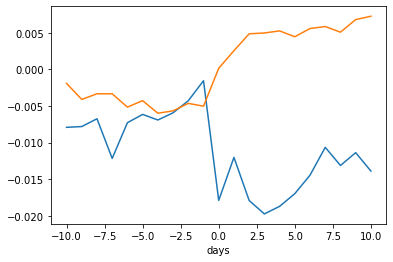

In [ ]:
##MAM TListed 
listedT = dates_car5.set_index('Acquiror ticker symbol')
listedT_1 = listedT[listedT['Tlist']==1].index
listedT_0 = listedT[listedT['Tlist']==0].index
final_results[final_results.index.isin(listedT_1)].mean().cumsum().plot()
final_results[final_results.index.isin(listedT_0)].mean().cumsum().plot()
plt.show()

In [ ]:
round(dates_car5[['Tlist','RelDum','CrossDum','RelSize','CAR5d']].corr(),2)

,Tlist,RelDum,CrossDum,RelSize,CAR5d
Tlist,1.00,0.09,-0.04,-0.00,-0.08
RelDum,0.09,1.00,0.02,-0.07,-0.00
CrossDum,-0.04,0.02,1.00,-0.02,0.04
RelSize,-0.00,-0.07,-0.02,1.00,0.02
CAR5d,-0.08,-0.00,0.04,0.02,1.00


In [ ]:
for country in dates_car5['Acquiror_country'].unique():
    results = smf.ols('CAR5d ~ Tlist+RelDum+CrossDum+RelSize', data = dates_car5[dates_car5['Acquiror_country']==country]).fit()
    print(country)
    print(results.summary())

KeyError: 'Acquiror_country'

In [ ]:
dates_car5['MarCap'].replace('n.a', None, regex=True).astype('float64')

0       7.168696e+10
1       4.790845e+10
2                NaN
3                NaN
4                NaN
            ...     
3384    3.105435e+07
3385    7.474569e+05
3386    5.256269e+06
3387             NaN
3388    4.467512e+07
Name: MarCap, Length: 3389, dtype: float64

In [ ]:
dates_car5['Target listed'].value_counts()

Unlisted                                                      2263
Unlisted\nUnlisted                                             150
Delisted                                                       115
Unlisted\nUnlisted\nUnlisted                                     9
Unlisted\nUnlisted\nUnlisted\nUnlisted\nUnlisted                 7
Unlisted\nUnlisted\nUnlisted\nUnlisted\nUnlisted\nUnlisted       3
Unlisted\nUnlisted\nUnlisted\nUnlisted                           2
Name: Target listed, dtype: int64

In [ ]:
profile = dates_car5.profile_report()

In [ ]:
profile